**Predict Future Sales Based On Historical Sales Data.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
data=pd.read_csv('Cleaned Sales Data.csv',sep=';')
data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales,Shipment Days,Year,Month
0,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,262.0,3.0,2017.0,11.0
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",732.0,3.0,2017.0,11.0
2,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,15.0,4.0,2017.0,6.0
3,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,958.0,7.0,2016.0,10.0
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.0,7.0,2016.0,10.0


In [4]:
data_grouped=data.groupby(['Year','Month'])['Sales'].sum().reset_index()
#Create a numerical represntation of time for forecasting
data_grouped['time']=range(len(data_grouped))
#features and target variables
x=data_grouped[['time']]
y=data_grouped['Sales']
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
# Fit the Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [5]:
#make predictions for the next 6 months
future=pd.DataFrame({'time':[len(data_grouped)+i for i in range(6)]})
future_predictions=model.predict(future)
future_sales=future_predictions

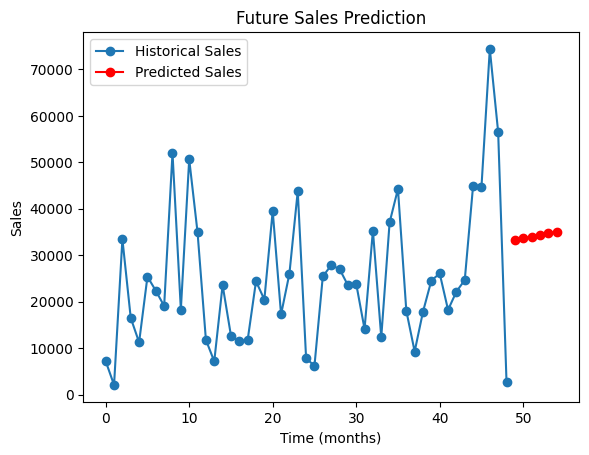

In [6]:
# Visualize historical and predicted sales
plt.plot(data_grouped['time'], data_grouped['Sales'], label='Historical Sales', marker='o')
plt.plot(future['time'], future_predictions, label='Predicted Sales', marker='o', color='red')
plt.xlabel('Time (months)')
plt.ylabel('Sales')
plt.title('Future Sales Prediction')
plt.legend()
plt.show()


**What will be the shipping delay trends in the upcoming months?**

In [7]:
from prophet import Prophet  # Import the Prophet class
import pandas as pd
# Import necessary library
import pandas as pd

# Convert 'Order Date' to datetime objects if it's not already
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d/%m/%Y')

# Aggregate shipping delay by month
monthly_shipping_delay = data.groupby(data['Order Date'].dt.to_period('M'))['Shipment Days'].mean().reset_index()

In [8]:
# Prepare the data for Prophet
monthly_shipping_delay.columns = ['ds', 'y']

In [9]:
# Prepare the data for Prophet
monthly_shipping_delay['ds'] = monthly_shipping_delay['ds'].dt.to_timestamp() # Convert 'ds' column to timestamps
monthly_shipping_delay.columns = ['ds', 'y']

In [10]:
# Fit Prophet model to forecast shipping delay
model = Prophet()
model.fit(monthly_shipping_delay)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4kg8f2hw/1e6odo9o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4kg8f2hw/f4l4m0y_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97112', 'data', 'file=/tmp/tmp4kg8f2hw/1e6odo9o.json', 'init=/tmp/tmp4kg8f2hw/f4l4m0y_.json', 'output', 'file=/tmp/tmp4kg8f2hw/prophet_modelc_boxv_s/prophet_model-20241018213359.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:33:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:33:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [11]:
# Forecast for the next 12 months
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


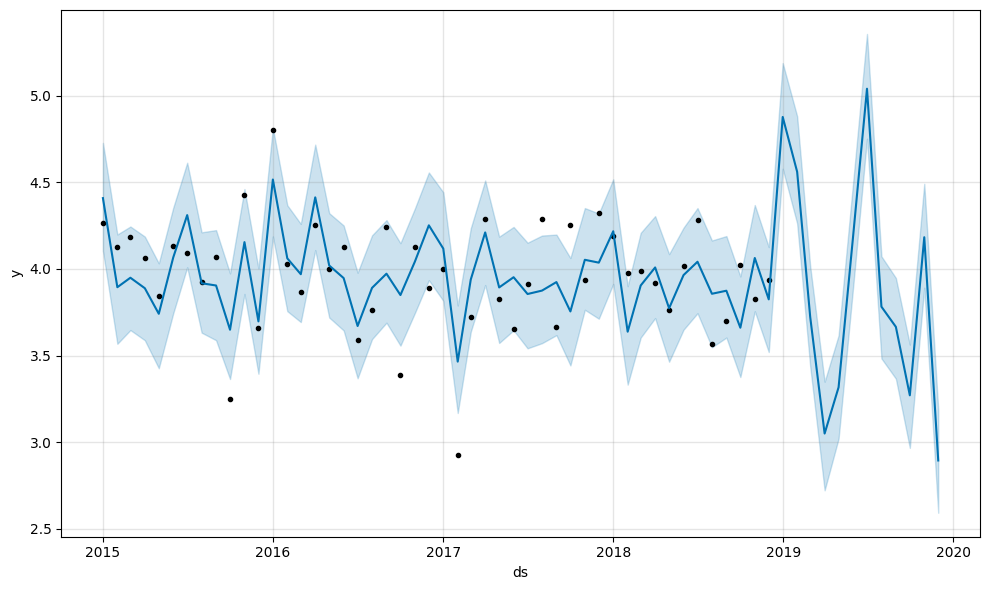

           ds      yhat
48 2018-12-31  4.877739
49 2019-01-31  4.560939
50 2019-02-28  3.723307
51 2019-03-31  3.049487
52 2019-04-30  3.316642
53 2019-05-31  4.183877
54 2019-06-30  5.040928
55 2019-07-31  3.782126
56 2019-08-31  3.665648
57 2019-09-30  3.270263
58 2019-10-31  4.183245
59 2019-11-30  2.893916


In [12]:
# Plot the forecast
model.plot(forecast)
plt.show()
# Print the forecast for shipping delays
print(forecast[['ds', 'yhat']].tail(12))